In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode

In [3]:
from langchain.chat_models import init_chat_model

In [4]:
gemini_llm = init_chat_model(model="gemini-2.0-flash-lite-001", model_provider="google_vertexai")

In [5]:
# Tools are where we have our functionality and we want llm to call our tool
from langchain.tools import tool

@tool("addition", parse_docstring=True, return_direct=True)
def add(a: int, b: int) -> int:
    """Addition of two numbers

    Args:
      a : number
      b : number

    Returns: sum of a, b
    """
    return a + b

In [6]:
@tool("subtraction", parse_docstring=True, return_direct=True)
def sub(a: int, b: int) -> int:
    """Subtract two numbers

    Args:
      a : number
      b : number

    """
    return a - b

In [7]:
@tool("multipy", parse_docstring=True, return_direct=True)
def mul(a: int, b: int) -> int:
    """Multiplication of two numbers

    Args:
      a : number
      b : number

    """
    return a * b

In [8]:
@tool("divide", parse_docstring=True, return_direct=True)
def div(a: int, b: int) -> int:
    """division of two numbers

    Args:
      a : number
      b : number

    """
    return a // b

In [10]:
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import SystemMessage

In [11]:
from IPython.display import Image, display
def display_graph(graph):
    display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
tool_node = ToolNode([add, sub, mul,div])
prompt = SystemMessage("You are an helpful assistantf")
agent = create_react_agent(
    model=gemini_llm,
    tools=tool_node,
    prompt=prompt)

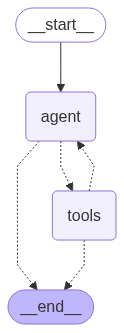

In [13]:
display_graph(agent)

In [14]:
response = agent.invoke({"messages": "What is 4 * 5 ?"})

In [17]:
user_input = input("Enter your question ?")
for step in agent.stream(
    {"messages": user_input},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

i have 2 pens bought 2 more, how many pens will i have now ?
================================== Ai Message ==================================
Tool Calls:
  addition (0bf48dff-f1f4-4ac7-84b5-325d0f63d23b)
 Call ID: 0bf48dff-f1f4-4ac7-84b5-325d0f63d23b
  Args:
    a: 2.0
    b: 2.0
================================= Tool Message =================================
Name: addition

4
